 # TASK4 -NEXT WORD PREDICTION

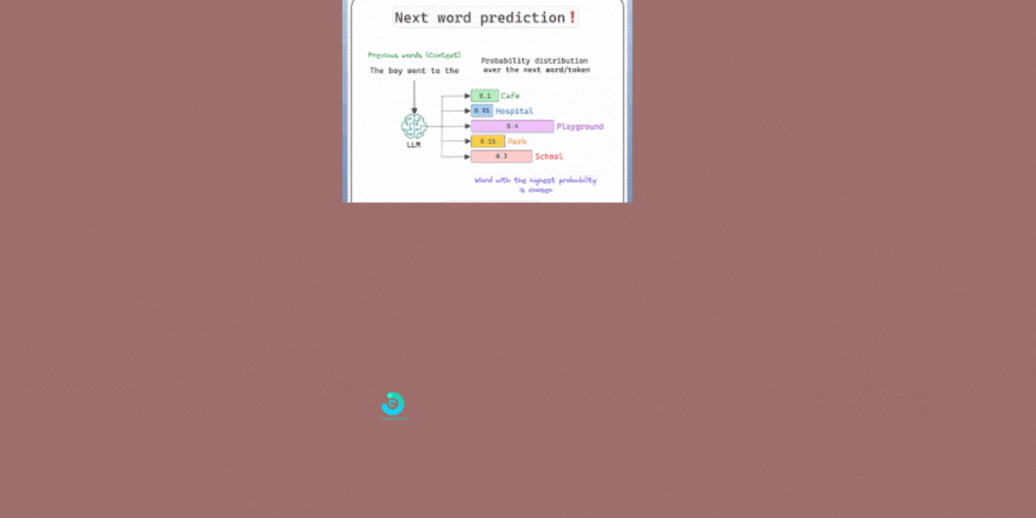

## BUSINESS CASE :-
**To build a model that can predict next word**

## IMPORTING THE NECESSARY LIBRARIES

In [2]:
#importing necessary libraries
import pandas as pd
import tensorflow as tf
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from tensorflow.keras.layers import Dense, Input
from keras.layers import Dense, Activation, LSTM
from tensorflow.keras.layers import Input  # If you are using TensorFlow 2.x, import Input from tensorflow.keras.layers
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import pickle
import heapq

## Loading the dataset 

In [3]:
df=pd.read_csv('tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


**Gettiing the data of the original_tille columns**

In [5]:
df= df['original_title']
df

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: original_title, Length: 4803, dtype: object

**Converting movie_name to list in order to tokenize it**

In [6]:
movie_name = df.to_list()
movie_name

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

## Tokenizing the Data

In [7]:
#tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(movie_name)
seq = tokenizer.texts_to_sequences(movie_name)
seq[:10]

[[1564],
 [210, 2, 1, 431, 47, 432, 72],
 [1565],
 [1, 52, 211, 1566],
 [212, 601],
 [213, 8, 21],
 [1567],
 [902, 146, 2, 1568],
 [110, 214, 4, 1, 433, 53, 147],
 [173, 340, 261, 85, 2, 903]]

In [8]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'and': 4,
 'in': 5,
 '2': 6,
 'to': 7,
 'man': 8,
 'i': 9,
 'love': 10,
 'with': 11,
 'on': 12,
 'me': 13,
 'my': 14,
 'movie': 15,
 'you': 16,
 'dead': 17,
 'last': 18,
 'for': 19,
 'from': 20,
 '3': 21,
 'good': 22,
 'big': 23,
 'day': 24,
 'house': 25,
 'ii': 26,
 'american': 27,
 'men': 28,
 'it': 29,
 'story': 30,
 'life': 31,
 'black': 32,
 'girl': 33,
 'all': 34,
 'out': 35,
 'time': 36,
 'night': 37,
 'is': 38,
 'world': 39,
 'days': 40,
 'star': 41,
 'part': 42,
 'new': 43,
 'de': 44,
 'little': 45,
 'la': 46,
 'at': 47,
 'up': 48,
 'an': 49,
 'die': 50,
 'city': 51,
 'dark': 52,
 'blood': 53,
 'game': 54,
 'one': 55,
 'red': 56,
 'blue': 57,
 'your': 58,
 'iii': 59,
 'kill': 60,
 'war': 61,
 'white': 62,
 'street': 63,
 'lost': 64,
 'christmas': 65,
 'legend': 66,
 'wild': 67,
 'how': 68,
 'road': 69,
 'boys': 70,
 'high': 71,
 'end': 72,
 'down': 73,
 'home': 74,
 'hard': 75,
 'boy': 76,
 'year': 77,
 'like': 78,
 'x': 79,
 'bad': 80,
 'do': 81

## Training the Data

In [9]:
X = []
y = []
total_words_dropped = 0

for i in seq:
    if len(i) > 1:
        for index in range(1, len(i)):
            X.append(i[:index])
            y.append(i[index])
    else:
        total_words_dropped += 1
        
print("Total Single Words Dropped are:", total_words_dropped)

Total Single Words Dropped are: 1003


In [10]:
X[:10]

[[210],
 [210, 2],
 [210, 2, 1],
 [210, 2, 1, 431],
 [210, 2, 1, 431, 47],
 [210, 2, 1, 431, 47, 432],
 [1],
 [1, 52],
 [1, 52, 211],
 [212]]

In [11]:
y[:10]

[2, 1, 431, 47, 432, 72, 52, 211, 1566, 601]

In [12]:
y[:10]

[2, 1, 431, 47, 432, 72, 52, 211, 1566, 601]

In [13]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)
X

array([[  0,   0,   0, ...,   0,   0, 210],
       [  0,   0,   0, ...,   0, 210,   2],
       [  0,   0,   0, ..., 210,   2,   1],
       ...,
       [  0,   0,   0, ...,   0,   0,  14],
       [  0,   0,   0, ...,   0,  14, 300],
       [  0,   0,   0, ...,  14, 300,  11]])

In [14]:
X.shape

(8483, 14)

In [15]:
X.shape

(8483, 14)

In [16]:
y = tf.keras.utils.to_categorical(y)
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y.shape

(8483, 5045)

In [18]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

5045

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 14),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 14)          70630     
                                                                 
 lstm (LSTM)                 (None, None, 100)         46000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 5045)              509545    
                                                                 
Total params: 716675 (2.73 MB)
Trainable params: 716675 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [21]:
model.fit(X, y, epochs=150)

Epoch 1/150
266/266 [==============================] - 89s 146ms/step - loss: 7.6282 - accuracy: 0.0599
Epoch 2/150
266/266 [==============================] - 38s 145ms/step - loss: 7.0230 - accuracy: 0.0685
Epoch 3/150
266/266 [==============================] - 36s 135ms/step - loss: 6.8413 - accuracy: 0.0828
Epoch 4/150
266/266 [==============================] - 35s 132ms/step - loss: 6.6754 - accuracy: 0.0891
Epoch 5/150
266/266 [==============================] - 35s 132ms/step - loss: 6.5203 - accuracy: 0.0980
Epoch 6/150
266/266 [==============================] - 35s 132ms/step - loss: 6.3647 - accuracy: 0.1068
Epoch 7/150
266/266 [==============================] - 44s 165ms/step - loss: 6.2158 - accuracy: 0.1077
Epoch 8/150
266/266 [==============================] - 41s 155ms/step - loss: 6.0795 - accuracy: 0.1099
Epoch 9/150
266/266 [==============================] - 50s 187ms/step - loss: 5.9492 - accuracy: 0.1132
Epoch 10/150
266/266 [==============================] - 47s 175m

In [24]:
model.save('nwp.h5')
vocab_array = np.array(list(tokenizer.word_index.keys()))
vocab_array           

C:\Users\ST\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


array(['the', 'of', 'a', ..., 'signed', 'sealed', 'delivered'],
      dtype='<U14')

## Testing

In [25]:
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        print(vocab_array[np.argsort(model.predict(text_padded)) - 1].ravel()[:-3])
        text += " " + prediction
    return text

In [26]:
make_prediction("jurassic", 1)

1/1 [==============================] - 0s 80ms/step
['budapest' 'traffic' 'bounce' ... 'iv' 'ii' 'iii']


'jurassic park'